<a href="https://colab.research.google.com/github/hadidaneshmand/measure_recovery_codes/blob/main/MeasureRecovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####Required liberaries (uncomment to install)
! pip install seaborn
! pip install pandas
import pandas as pd
import seaborn as sns
# import ot
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng




Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from  scipy.optimize import newton
import math
from google.colab import files
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy import signal
import itertools
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import pyplot as plt
from scipy.special import sici

In [ ]:
%pylab
%matplotlib inline
  
from google.colab import files
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy import signal
import itertools
from matplotlib import animation, rc
from IPython.display import HTML
import random
random.seed(20)

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
dtype = torch.float64 # tensor type
def experiment(X,Y,itr_num,gamma = 0.005,angles_col = True): # running experiment on random inputs X and Y
  features = 1000
  n = X.size(0)
  def expand(vec,features): 
    veco = vec.reshape(len(vec),1).repeat(features,axis=1)
    return torch.tensor(veco.T).type(dtype)
  Y2 = expand(y,features).T
  F = 2*np.asarray(range(features))+1
  F = expand(F,n)
  FY = Y2 * F
  ceof = 2*np.asarray(range(features))+1
  ceof = np.sqrt(4.0/(math.pi*ceof))
  ceof = expand(ceof,n)
  ceof = torch.cat((ceof,ceof),1)
  FY = ceof*torch.cat((torch.cos(FY),-1*torch.sin(FY)),1)
  def compute_ang_kernel(X,Y):
    Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
    Delta =torch.abs(Xg-Yg) 
    return torch.abs(math.pi-Delta)#*torch.cos(Delta)+torch.sin(Delta)
  kernel_fun = compute_ang_kernel
  def gradf(X,Y):
    Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
    Delta =Xg-Yg
    return -1*torch.mean(torch.sign(Delta),axis=1)##torch.mean(torch.tanh(Delta),axis=1)
  def gradfE(X): 
    X2 = expand(X.data.numpy(),features).T
    FX = X2 * F 
    FX = ceof*torch.cat((torch.sin(FX),torch.cos(FX)),1)
    return -1*torch.mean(FX.mm(FY.t()),axis=1)
  angles = []
  itrs = []
  for jj in range(n):
      for k in range(itr_num):
        loss =  - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
        X.data[jj] =  X.data[jj] - gamma*(gradf(X,X)-gradfE(X))[jj]
        # if (k % 50 ==0) & angles_col: 
        #   angles.append(X.data.detach().numpy().copy())
        #   itrs.append(k+itr_num*jj)
  xs = np.asarray(sorted(X.data.detach().numpy()))
  ys = np.asarray(sorted(Y.data.detach().numpy()))
  return max(abs(xs-ys)),X,angles,itrs

In [ ]:
n=4
y = np.random.rand(n)*math.pi
Y =torch.tensor(y).type(dtype)
x = np.random.rand(n)*math.pi
X =torch.tensor(x).type(dtype)
loss,X,angles,itrs = experiment(X,Y,1000,gamma = 0.01)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


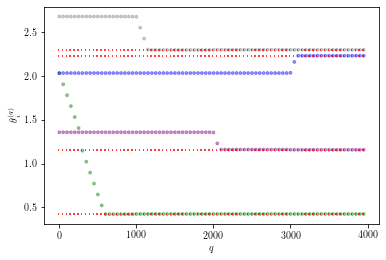

In [ ]:
xs = []
ys = []
xs1 = []
ys1 = []
CS = []

colrs = ['green','gray','purple','blue','c']
B = Y.data.detach().numpy()
jj = 0

for angle in angles:  
  #  print(angle)
   j = 0 
   ind = itrs[jj]
   for ai in angle: 
      CS.append(colrs[j % 5])
      xs.append(ind)
      # print(ind,ai)
      ys.append(ai)
      j = j+1
   for bi in B: 
      xs1.append(ind)
      ys1.append(bi)
      j = j+1
   
   
   jj = jj +1 

plt.scatter(xs,ys,8*np.ones(len(xs)),c=CS,alpha=0.4)
plt.scatter(xs1,ys1,2*np.ones(len(xs1)),color='red',marker=0)
plt.xlabel('$q$')
font = {'size'   : 14}
matplotlib.rc('font', **font)
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
plt.ylabel('$\\theta_i^{(q)}$')
plt.savefig('particle_learning.pdf',format='pdf')

In [ ]:
files.download('particle_learning.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

alllosses = []
ks = [300,300,300,300,300,300]
ns = [100,10]
repeat = 6
allws = []
for n  in ns:
  wdisn = []
  for j in range(repeat):
    wdises = []
    print(n)
    y = np.random.rand(n)*math.pi
    Y =torch.tensor(y).type(dtype)
    x = np.random.rand(n)*math.pi
    X =torch.tensor(x).type(dtype)
    for mm in range(len(ks)):
      ITRNUM = ks[mm]
      wdis,X,_,_ = experiment(X,Y,ITRNUM,angles_col = False,gamma = 0.01)
      print(wdis)
      wdises.append(wdis)
    wdisn.append(wdises)
  allws.append(wdisn)
  

100
0.13453425409755448
0.08807175355111241
0.05806966806391878
0.028072434286726677
0.00013473110675381317
0.00013473110675381317
100
0.3158583755023303
0.1617218405154588
0.1317362119884451
0.10172802831802663
0.0717468489325983
0.041733013001185926
100
0.1740755566572605


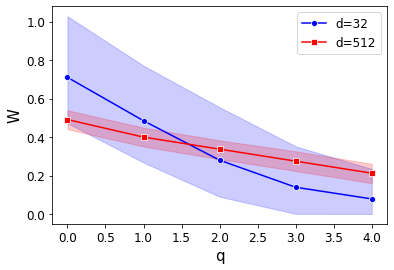

In [ ]:
allws = np.asarray(allws)
results=[]

D = []
for i in range(repeat):
    run_dict={'run_id': np.ones(len(allws[0,i,:]),dtype=np.int8)*i,'W':allws[0,i,:],'q':allws[1,i,:]}
    for i in range(len(allws[0,i,:])): 
        D.append(i)
    results.append(pd.DataFrame(run_dict))
    
results=pd.concat(results)
results.reset_index(inplace=True)
p1 = sns.lineplot(data=results,x=D,y="W", label='n=100', marker = 'o', ci=95,color='blue')
p1 = sns.lineplot(data=results,x=D,y="q",label='n=10',  marker='s',ci=95,color='red')
p1.set_xlabel('K', fontsize=15)
p1.set_ylabel('$W(\nu_K,\mu)$',fontsize=15)
fig = p1.get_figure()
fig.savefig('wq.pdf',format='pdf')

[]

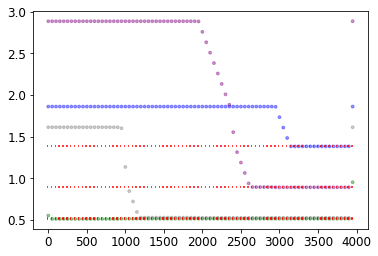

In [ ]:
j

9

In [ ]:
xs

[400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400,
 400

In [ ]:
itrs

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1300,
 1350,
 1400,
 1450,
 1500,
 1550,
 1600,
 1650,
 1700,
 1750,
 1800,
 1850,
 1900,
 1950,
 2000,
 2050,
 2100,
 2150,
 2200,
 2250,
 2300,
 2350,
 2400,
 2450,
 2500,
 2550,
 2600,
 2650,
 2700,
 2750,
 2800,
 2850,
 2900,
 2950,
 3000,
 3050,
 3100,
 3150,
 3200,
 3250,
 3300,
 3350,
 3400,
 3450,
 3500,
 3550,
 3600,
 3650,
 3700,
 3750,
 3800,
 3850,
 3900,
 3950]

In [ ]:
files.download('learning_1000_gaussian.pdf')
# -1*torch.sum(FX.mm(FY.t()),axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
torch.sign(Delta)

tensor([[ 1., -1.,  1., -1.,  1.],
        [ 1., -1.,  1., -1.,  1.],
        [ 1., -1.,  1., -1.,  1.],
        [ 1., -1.,  1., -1., -1.],
        [ 1., -1.,  1., -1., -1.]], dtype=torch.float64)

In [ ]:
FX.mm(FY.t())

tensor([[ 1.0017, -0.9989,  0.9858, -1.0076,  0.8191],
        [ 1.0012, -1.0005,  0.9880, -1.0075,  0.4188],
        [ 1.0003, -1.0017,  0.9956, -1.0039,  0.0097],
        [ 0.9984, -1.0015,  1.0141, -0.9936, -0.8174],
        [ 0.9992, -1.0021,  1.0054, -0.9988, -0.4037]], dtype=torch.float64)

In [ ]:
gradf(X,Y)

tensor([ 0.3333,  0.3333, -0.3333], dtype=torch.float64)

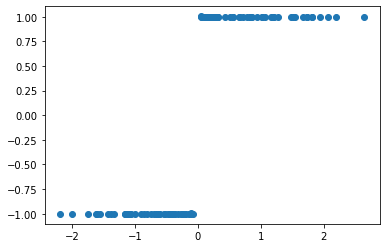

In [ ]:
n = 100
def expand(vec,features): 
  veco = vec.reshape(len(vec),1).repeat(features,axis=1)
  return torch.tensor(veco.T).type(dtype)
ceof = np.asarray(range(features))+1
ceof = (2-2*(-1)**ceof)/(math.pi*ceof)
ceof = expand(ceof,n)
# ceof = torch.cat((ceof,ceof),1)
ceof = ceof.T
fs = np.asarray(range(features))+1
F = expand(fs,n).T
x = np.random.randn(n)
Xe = expand(x,features)
out = torch.sum((ceof*torch.sin(F*Xe)).T,axis=1)
plt.scatter(x,out.data.numpy())

In [ ]:
loss =  - 2*torch.mean(kernelf(Y,Y))  + torch.mean(kernelf(Y,Y)) + torch.mean(kernelf(Y,Y))  #

In [ ]:
gamma

<function RandomState.gamma>

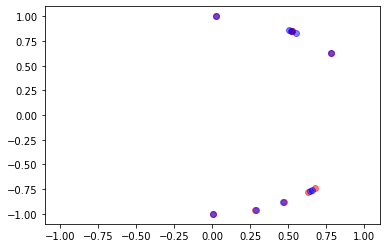

In [ ]:
def animated_plot(XI,YI):
  fig, ax = plt.subplots()

  s = ax.scatter([], [])
  a = min(np.min(np.asarray(XI)),np.min(np.asarray(YI)))
  b = max(np.max(np.asarray(XI)),np.max(np.asarray(YI)))
  ax.set_xlim(a, b)
  ax.set_ylim(a, b )

  def update(i):
      i = min(i, len(XI)-1)
      ax.clear()
      ax.set_xlim(a-0.1, b+0.1)
      ax.set_ylim(a-0.1,b +0.1)
      ax.scatter(XI[i][:,0], XI[i][:,1],alpha=0.5, c='red')
      ax.scatter(YI[i][:,0], YI[i][:,1],alpha=0.5, c='blue')

  ani = animation.FuncAnimation(fig, update, frames=100, interval=500)
  return ani
HTML(animated_plot(XI,YI).to_html5_video())

[array([[ 0.75557602,  0.65506098],
        [ 0.99986315,  0.01654324],
        [ 0.88832433,  0.45921661],
        [ 0.35073294,  0.93647552],
        [ 0.01702147,  0.99985512],
        [ 0.87233924,  0.48890106],
        [ 0.74093462,  0.67157717],
        [ 0.64649078,  0.7629218 ],
        [ 0.42590994,  0.90476556],
        [ 0.95440434, -0.29851691]]), array([[ 0.82147856,  0.57023941],
        [ 0.90831588, -0.4182849 ],
        [ 0.99193196,  0.12677136],
        [ 0.49697402,  0.86776542],
        [ 0.06752422,  0.99771764],
        [ 0.95770466,  0.28775299],
        [ 0.78341042,  0.62150472],
        [ 0.57911501,  0.81524586],
        [ 0.52519095,  0.85098441],
        [ 0.69169094, -0.72219363]]), array([[ 0.84644784,  0.53247164],
        [ 0.63728398, -0.77062905],
        [ 0.97770177, -0.20999821],
        [ 0.51817078,  0.85527717],
        [ 0.06119016,  0.99812613],
        [ 0.99372103,  0.1118862 ],
        [ 0.78325574,  0.62169964],
        [ 0.57755466,  0.8

-1.2984446748772418
0.06893914593393502
--
-1.032920630494318
0.04965749176388945
--
-0.8397890125370818
0.037676510213309644
--
-0.7838426696394479
0.033087903879361225
--
-0.8010122123995154
0.031366536172658055
--
-0.8154625804895125
0.02990253617265859
--
-0.816728084871374
0.02871053617265895
--
-0.8181537037224829
0.027518536172659314
--
-0.8215228368355288
0.026302536172658986
--
-0.8232683412173899
0.025110536172658904
--
-0.8251739600684991
0.023918536172658822
--
-0.8290230931815443
0.022702536172659382
--
-0.8312485975634057
0.0215105361726593
--
-0.823238768765419
0.020614536172659736
--
-0.8137984006120409
0.019798536172660253
--
-0.8030544037274783
0.01900653617265924
--
-0.7927905213121633
0.018214536172660445
--
-0.7847901531587853
0.017398536172660517
--
-0.7754861562742221
0.016606536172659503
--
-0.7666622738589068
0.01581453617266071
--
-0.7601019057055283
0.014998536172660337
--
-0.7522379088209651
0.014206536172659767
--
-0.7448540264056496
0.013414536172660085
--

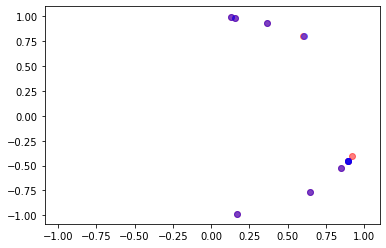

In [ ]:
##### 2D case random fetures
pdist = torch.nn.PairwiseDistance(p=2)
def compute_ang_kernel(X,Y):
  # K = (X-Y)**2
  # K = -1*(K) 
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  # K = (math.pi-Delta) *torch.cos(X-Y)+torch.sin(X-Y)
  Delta =torch.abs(Xg-Yg) 
  return torch.abs(math.pi-Delta)#*torch.cos(Delta)+torch.sin(Delta)#(math.pi-Delta)*torch.sqrt(1-torch.sin(Delta))*torch.sqrt(1+torch.sin(Delta))#*torch.cos(Delta)+torch.sin(Delta) #(math.pi-Delta)*torch.cos(Delta)+torch.sin(Delta)#0.25-0.25*torch.sin(Delta)#*torch.cos(Xg+Yg)#torch.abs(torch.sin(Xg)-torch.sin(Yg))#(math.pi-Delta)#*torch.cos(Delta) + torch.sin(Delta) #torch.tanh(Xg-Yg)*torch.cos(Xg-Yg) #(math.pi-Delta)#(math.pi - Delta)**2#*torch.cos(Delta) + torch.sin(Delta) 
def gradf(X,Y):
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  Delta =Xg-Yg
  K = Delta
  K.fill_(1)
  K[torch.logical_and(Delta>-1*math.pi, Delta<0)]  = -1
  K[torch.logical_and(Delta>math.pi, Delta<2*math.pi)]  = -1
  return -1*torch.mean(K ,axis=1)
def gradf(X,Y):
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  Delta =Xg-Yg
  return -1*torch.mean((math.pi-torch.abs(Delta))*Delta,axis=1)
# def gradf(X,Y):
#   Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
#   Delta =Xg-Yg
#   return -1*torch.mean((math.pi-torch.abs(Delta))*Delta,axis=1) #torch.mean(-1*(math.pi-Delta)*torch.sign(Delta),dim=1)#torch.mean(-1*(math.pi-torch.abs(Delta))*torch.sin(Delta),dim=1)
m1 = 10
m2 = 10
wdist = []
d = 1
x = math.pi*(np.random.rand(m1,1)) #+ math.pi*np.ones((m1,1))/2
X = torch.tensor(x,requires_grad=True).type(dtype)
# X.data.fill_(0.1)
y = math.pi*(np.random.rand(m2,1))
y[0] = y[1] 
y[2] = y[1]
Y =torch.tensor(y).type(dtype)
gamma = 0.01
ind = 0 
XI = []
YI = []
itrs =[]
kernel_fun = compute_ang_kernel
for k in range(5000):
  loss =  - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
  # print(torch.autograd.grad(loss,X,retain_graph=True)[0][0])\
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0]#(gradf(X,X)-gradf(X,Y)).reshape(m1,1)#torch.autograd.grad(loss,X,retain_graph=True)[0]
  X.data =  X.data - gamma*grad.data#(gradf(X,X)-gradf(X,Y)).reshape(m1,1) # torch.autograd.grad(loss,X,retain_graph=True)[0] #
  onesT = torch.ones(X.size()).type(dtype)
  # X =  X % (2*math.pi)
  # X = X- torch.mean(X)
  if k % 100 == 0:
      Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
      Delta =Xg-Yg
      grad = -gradf(X,Y)
      print(torch.sum(grad).item())
      # Ele = Grad[0]
      # print( torch.mean(torch.sign(Xg-Yg)))
      Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
      Delta = Xg-Yg
      # print(torch.cos(Delta[0]).detach().numpy())
      # print((torch.sin(Delta)*Grad[0]).detach().numpy())
      # wdist.append(compute_w1(X,Y))
      # print(loss.item(),compute_w1(X,Y))
      print(loss.item())
      print('--')
      itrs.append(k)
      A = X.data.detach().numpy()
      B = Y.data.detach().numpy()
      Xi = np.c_[np.sin(A),np.cos(A)]
      Yi = np.c_[np.sin(B),np.cos(B)]
      XI.append(Xi)
      YI.append(Yi)
      # plt.figure()
      # plt.scatter(Xi[:,0],Xi[:,1],alpha=0.5,color='red')
      # plt.scatter(Yi[:,0],Yi[:,1],alpha=0.5,color='blue')
      # nameplot = 'plots/conv%d.pdf' % (ind)
      # plt.savefig(nameplot)   
      # files.download(nameplot)
      ind = ind + 1

HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
Y =torch.tensor(y).type(dtype)

ValueError: ignored

In [ ]:
dtype = torch.float64 # tensor type
n = 128 # number of inputs
def animated_plot(XI,YI):
  fig, ax = plt.subplots()

  s = ax.scatter([], [])
  a = min(np.min(np.asarray(XI)),np.min(np.asarray(YI)))
  b = max(np.max(np.asarray(XI)),np.max(np.asarray(YI)))
  ax.set_xlim(a, b)
  ax.set_ylim(a, b )

  def update(i):
      i = min(i, len(XI)-1)
      ax.clear()
      ax.set_xlim(a-0.1, b+0.1)
      ax.set_ylim(a-0.1,b +0.1)
      ax.scatter(XI[i][:,0], XI[i][:,1],alpha=0.5, c='red')
      ax.scatter(YI[i][:,0], YI[i][:,1],alpha=0.5, c='blue')

  ani = animation.FuncAnimation(fig, update, frames=100, interval=500)
  return ani
def compute_kernel_mat_approximate(X,Y):
  m1 = X.size(0)
  m2 = Y.size(0)
  Xn = torch.nn.functional.normalize(X,p=2,dim=1)
  Yn =  torch.nn.functional.normalize(Y,p=2,dim=1)
  normX = torch.norm(X,dim=1).reshape(m1,1)
  normY = torch.norm(Y,dim=1).reshape(m2,1)
  onesT =torch.ones(m1,m2).type(dtype)
  moT = -1*onesT
  piT = math.pi*onesT
  piT = math.pi*onesT
  AG =torch.arccos(Xn.mm(Yn.t())/(1.000001))#torch.arccos(torch.maximum(torch.minimum(Xn.mm(Yn.t()),onesT),moT))#torch.arccos(Xn.mm(Yn.t())/(1.000001))#torch.arccos(torch.maximum(torch.minimum(Xn.mm(Yn.t()),onesT),moT))
  K = (math.pi-AG)#-1*torch.log(torch.cosh(AG))#(math.pi-AG)*torch.cos(AG)#**2#(math.pi-AG)#(math.pi**2-AG**2)+AG
  
  return K

def compute_kernel_mat(X,Y):
  m1 = X.size(0)
  m2 = Y.size(0)
  Xn = torch.nn.functional.normalize(X,p=2,dim=1)
  Yn =  torch.nn.functional.normalize(Y,p=2,dim=1)
  normX = torch.norm(X,dim=1).reshape(m1,1)
  normY = torch.norm(Y,dim=1).reshape(m2,1)
  onesT =torch.ones(m1,m2).type(dtype)
  moT = -1*onesT
  piT = math.pi*onesT
  AG = torch.arccos(torch.maximum(torch.minimum(Xn.mm(Yn.t()),onesT),moT))
  K =  (normX.mm(normY.t())).mul(((piT-AG)*torch.cos(AG)+torch.sin(AG) )/(2*math.pi))
  return K

In [ ]:
def compute_transport(M):
  asi = M.shape[0]
  a = np.ones(asi)/asi
  G = ot.emd(a, a, M)
  return np.sum(G*M)

def compute_transport2(M):
  asi = M.shape[0]
  a = np.ones(asi)/asi
  G = ot.emd(a, a, M)
  return G

0.013355288934149723 0.03348573916896288
0.012856457697202117 0.03254750710681225
0.012407418444536411 0.03057511138936655
0.012029556290919619 0.027847751634329707
0.011718875255986472 0.025643303855737286
0.011454181047286127 0.023698906392624102
0.011219776761689282 0.022884375274839698
0.01099929731222149 0.022246957095703585
0.010790476023769369 0.02166789936460634
0.010592067846550535 0.02113365826517713
0.010403069152519873 0.02063735300728282


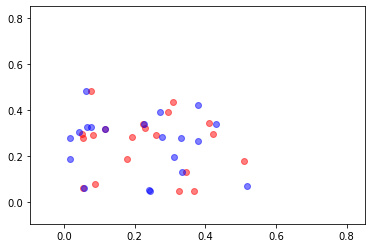

In [ ]:
### partial optimization 

m1 = 20
m2 = 20
d = 10
x = np.random.rand(m1,d)

X = torch.tensor(x,requires_grad=True).type(dtype)
y = np.random.rand(m2,d)
Y =torch.tensor(y).type(dtype)
X = torch.nn.functional.normalize(X,p=2,dim=1)
Y = torch.nn.functional.normalize(Y,p=2,dim=1)

X.data[:,1:d] = Y.data[:,1:d]
gamma = 0.001
XI = []
YI = []
ind = 0
kernel_fun = compute_kernel_mat_approximate
for k in range(5001):
  loss = - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0] #(grad(X,X)-grad(X,Y)).reshape(m1,d)
  if k % 500 == 0:
    X1 =  torch.nn.functional.normalize(X.data,p=2,dim=1)
    xi = X1.detach().numpy()
    yi = Y.data.detach().numpy()
    # xi[:,0] = np.sin(xi[:,0])
    # xi[:,1] = np.cos(xi[:,0])
    # yi[:,0] = np.sin(yi[:,0])
    # yi[:,1] = np.cos(yi[:,0])
    XI.append(xi)
    YI.append(yi)
    print(loss.item(),torch.norm(grad).item())
  
    ind = ind + 1
  X.data[:,0] = X.data[:,0] - gamma*grad.data[:,0] #+ gamma*torch.randn(X.size())
  X.data =  torch.nn.functional.normalize(X.data,p=2,dim=1)
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
xi.shape

(10, 50)

2.1363344095620085


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.08871110889988643


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.018372830749767255


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.013737855553717093


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.010649494689793482


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.008628502649275616


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.007017748056135087


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.005332605253615785


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.0037187574310444393


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.0028626740419384067


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.002243294063973167


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

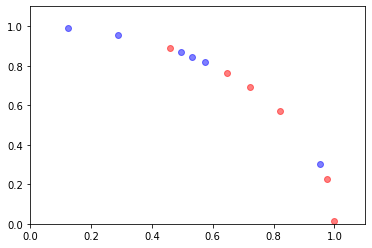

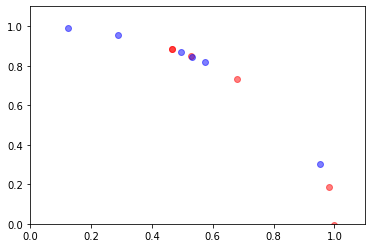

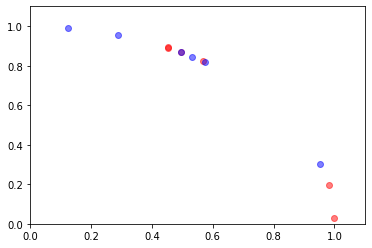

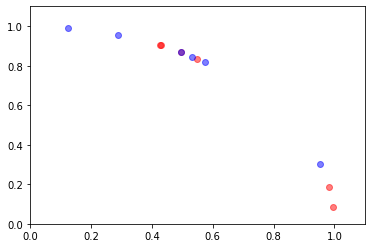

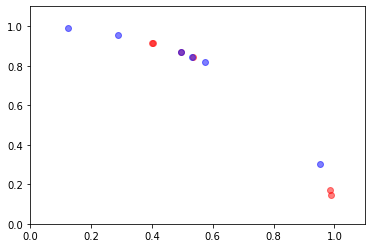

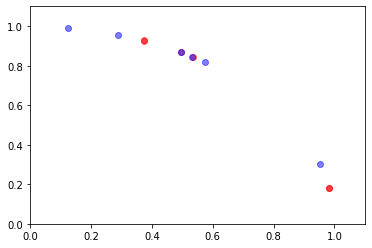

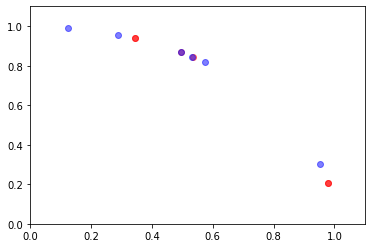

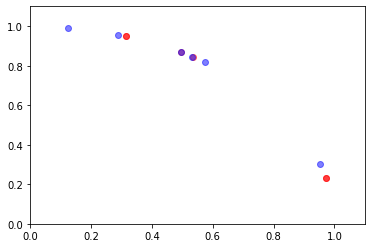

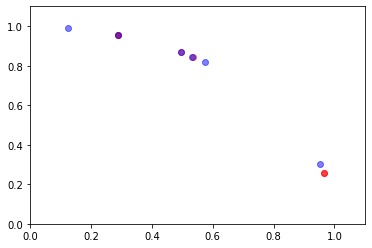

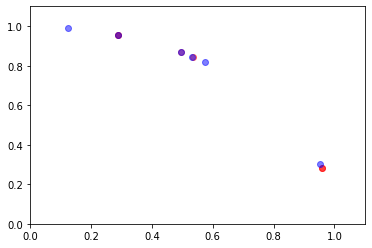

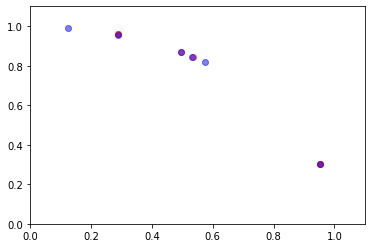

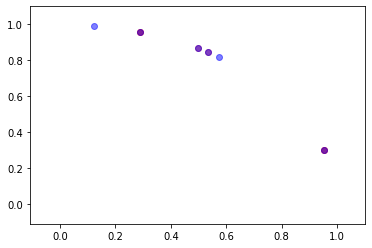

In [ ]:
#### function approximation
m1 = 6
m2 = 6
d = 2
x = np.random.rand(m1,d)
X = torch.tensor(x,requires_grad=True).type(dtype)
y = np.random.rand(m2,d)
Y =torch.tensor(y).type(dtype)
X = torch.nn.functional.normalize(X,p=2,dim=1)
Y = torch.nn.functional.normalize(Y,p=2,dim=1)
beta =  torch.tensor(np.random.rand(m2),requires_grad=True).type(dtype)
alpha = torch.tensor(np.random.randn(m1),requires_grad=True).type(dtype)
# alpha.data = beta.data
gamma = 0.01
XI = []
YI = []
ind = 0
kernel_fun = compute_kernel_mat_approximate
for k in range(2001):

  Dalpha = torch.diag(alpha)
  Dbeta = torch.diag(beta)
  loss = - 2*torch.mean(Dalpha.mm(kernel_fun(X,Y)).mm(Dbeta))  + torch.mean(Dalpha.mm(kernel_fun(X,X)).mm(Dalpha)) + torch.mean(Dbeta.mm(kernel_fun(Y,Y)).mm(Dbeta))  #
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0] #(grad(X,X)-grad(X,Y)).reshape(m1,d)
  X.data = X.data - gamma*grad.data #+ gamma*torch.randn(X.size())
  X = torch.nn.functional.normalize(X,p=2,dim=1)
  alpha.data = alpha.data - gamma*torch.autograd.grad(loss,alpha,retain_graph=True)[0]
  if k % 200 == 0:
    xi = X.data.detach().numpy()
    yi = Y.data.detach().numpy()
    XI.append(xi)
    YI.append(yi)
    print(loss.item())
    
    fig, ax = plt.subplots()
    a = 0
    b = 1.1
    ax.set_xlim(a, b)
    ax.set_ylim(a, b )
    ax.scatter(xi[:,0],xi[:,1],alpha=0.5,color='red')
    ax.scatter(yi[:,0],yi[:,1],alpha=0.5,color='blue')
    nameplot = 'plots/nnconv%d.pdf' % (ind)
    fig.savefig(nameplot)   
    files.download(nameplot)
    ind = ind + 1
  # X =  torch.nn.functional.normalize(X,p=2,dim=1)
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
alpha

tensor([-0.6502,  0.1104, -0.6467,  0.3844, -1.5316, -0.0397, -0.3218, -0.3769,
         0.1673,  0.7106,  0.9720,  1.1322,  0.9371,  0.3079,  1.0548,  0.3090,
        -1.3515,  0.7968,  1.3535, -0.0763, -0.1287, -1.5975, -0.2161,  0.6504,
         0.2514,  0.0875, -0.2054, -0.1817, -0.3056,  0.0767, -1.3266,  0.9829,
         1.8469, -1.3983,  1.4736,  0.2979, -0.0763, -0.7482,  0.5248,  0.9661,
        -0.2448,  1.7784,  0.8033, -1.0013, -1.4317,  0.3292, -1.0548,  0.1104,
        -0.0442,  1.2249,  1.0775, -1.9792, -1.1301, -0.0537, -0.3261,  0.2091,
        -0.3766, -0.3371,  0.5051,  0.5418,  1.2620,  0.4357,  1.0442,  1.4160,
        -0.1152,  1.3139, -0.4211, -1.0912, -1.0380, -0.9989,  0.4159, -0.0163,
         1.0614, -0.6405,  1.3208,  0.2690,  2.0971,  1.3829,  0.8612,  0.4947,
         1.1326, -2.0566, -1.2308,  0.3056, -0.5401, -0.9282,  1.6135, -0.4208,
         0.2279, -0.1152,  0.7114,  1.5494, -0.3925, -2.6807,  1.0672,  0.5510,
         1.1986, -0.3013, -1.0747,  1.44

0.14455730364442365
0.001243719623923667
0.0009317142765628006
0.0004679580959123797
0.00034169524600846657
0.0002871250391951463
0.00025393520245708956
0.00023011138353634664
0.00021157712904162906
0.00019649017186074147
0.00018386233952760733
0.00017310243472712372
0.00016382508815837582
0.00015576032206521262
0.00014870772635955376
0.00014251192216274688
0.00013704863335650685
0.00013221625751169697
0.00012793042257142062
0.00012412025652874803
0.00012072570133891958
0.00011769550338280865
0.0001149856664506288
0.00011255823564848555
0.00011038032610954929
0.00010842333757743461
0.00010666231280165306
0.00010507540887738642
0.00010364345822555521
0.00010234960139987592
0.00010117897818195942
0.00010011846598168006
9.9156457206373e-05
9.828266878875169e-05
9.748797861863778e-05
9.676428427596306e-05
9.610438082097161e-05
9.550185452988913e-05
9.49509903263035e-05
9.44466909276187e-05
9.398440590180357e-05


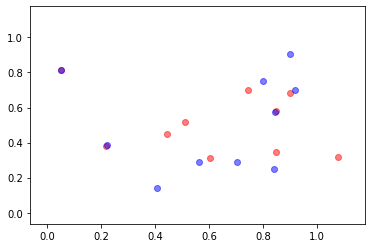

In [ ]:
#### 1 homogenous test
m1 = 10
m2 = 10
d = 2
x = np.random.rand(m1,d)
X = torch.tensor(x,requires_grad=True).type(dtype)
y = np.random.rand(m2,d)
Y =torch.tensor(y).type(dtype)
X = torch.nn.functional.normalize(X,p=2,dim=1)
# Y = torch.nn.functional.normalize(Y,p=2,dim=1)
# beta =  torch.tensor(np.random.rand(m2),requires_grad=True).type(dtype)
# alpha = torch.tensor(np.random.randn(m1),requires_grad=True).type(dtype)
# alpha.data = beta.data
gamma = 0.05
XI = []
YI = []
ind = 0
kernel_fun = compute_kernel_mat_approximate
for k in range(20001):
  normX = torch.norm(X,dim=1)
  Dalpha = torch.diag(normX)
  normY  = torch.norm(Y,dim=1)
  Dbeta = torch.diag(normY)
  loss = - 2*torch.mean(Dalpha.mm(kernel_fun(X,Y)).mm(Dbeta))  + torch.mean(Dalpha.mm(kernel_fun(X,X)).mm(Dalpha)) + torch.mean(Dbeta.mm(kernel_fun(Y,Y)).mm(Dbeta))  #
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0] #(grad(X,X)-grad(X,Y)).reshape(m1,d)
  X.data = X.data - gamma*grad.data #+ gamma*torch.randn(X.size())
  if k % 500 == 0:
    # X1 =  torch.nn.functional.normalize(X,p=2,dim=1)
    xi = X.data.detach().numpy()
    yi = Y.data.detach().numpy()
    XI.append(xi)
    YI.append(yi)
    print(loss.item())
    ind = ind + 1
  # X =  torch.nn.functional.normalize(X,p=2,dim=1)
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
alpha

tensor([1.0156, 0.0024, 0.1072, 0.0700, 0.7179, 0.5915, 0.9690],
       dtype=torch.float64, requires_grad=True)

In [ ]:
beta

tensor([9.6911e-01, 7.5006e-02, 1.7406e-01, 8.4082e-05, 7.1906e-01, 5.7235e-01,
        9.6571e-01], dtype=torch.float64, requires_grad=True)

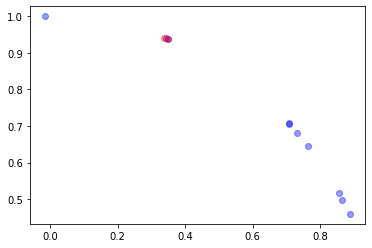

In [ ]:
plt.scatter(xi[:,0],xi[:,1],color='blue',alpha=0.4)
plt.scatter(yi[:,0],yi[:,1],color='red',alpha=0.4)


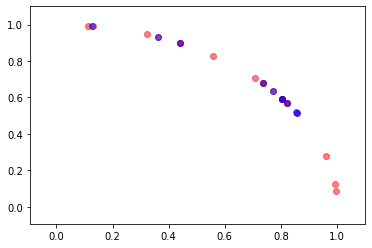

In [ ]:
HTML(animated_plot(XI,YI).to_html5_video())

0.08168206772378284 0.0009015331940682329
0.0816779588076324 0.0009116126139588061
0.08167375526139553 0.0009222917478354539
0.08166945043643503 0.000933572612044674
0.08166503746118625 0.0009454585228766591
0.08166050921740098 0.000957953889485224
0.08165585831790434 0.0009710639929270796
0.08165107708552855 0.0009847947498730733
0.08164615753359872 0.0009991524590760045
0.08164109134844644 0.0010141435284687316
0.08163586987420368 0.0010297741804285495


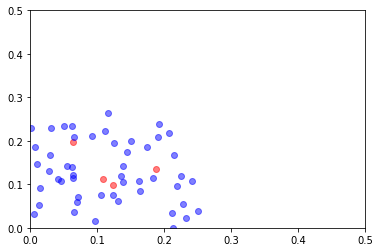

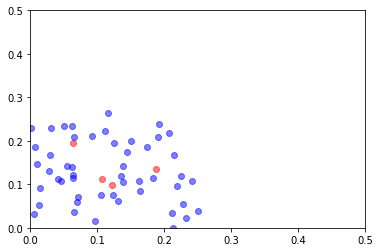

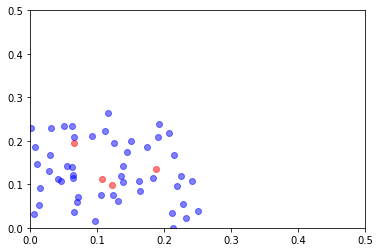

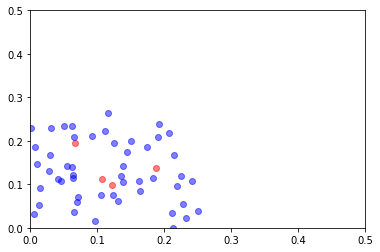

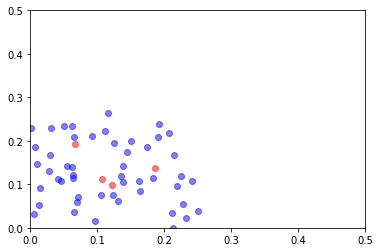

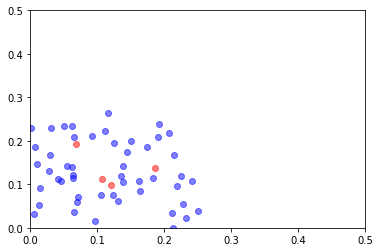

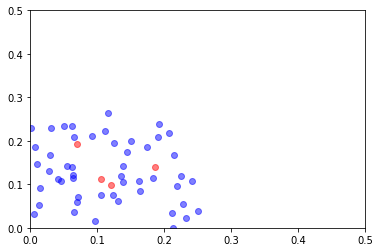

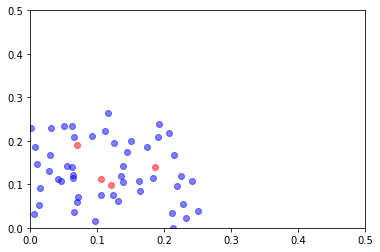

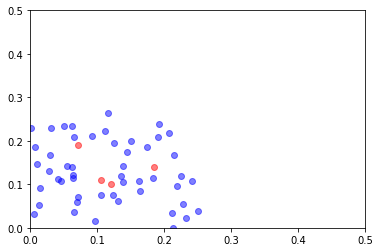

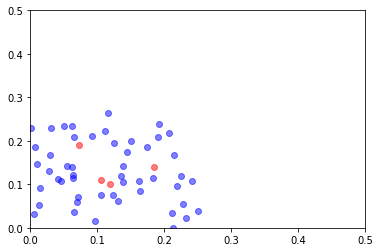

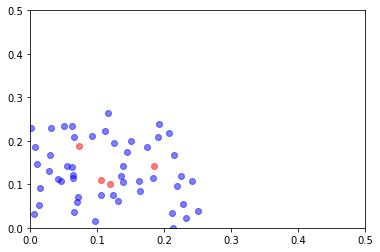

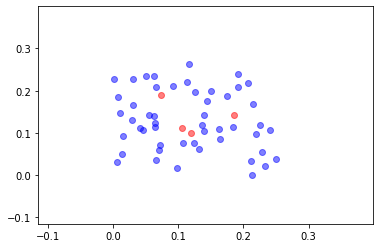

In [ ]:
m1 = 4
m2 = 50
d = 50
x = np.random.rand(m1,d)

# X = torch.tensor(x,requires_grad=True).type(dtype)
# y = np.random.rand(m2,d)
# Y =torch.tensor(y).type(dtype)
# X = torch.nn.functional.normalize(X,p=2,dim=1)
# Y = torch.nn.functional.normalize(Y,p=2,dim=1)

gamma = 0.01
XI = []
YI = []
ind = 0
kernel_fun = compute_kernel_mat_approximate
for k in range(5001):
  loss = - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0] #(grad(X,X)-grad(X,Y)).reshape(m1,d)
  if k % 500 == 0:
    X1 =  torch.nn.functional.normalize(X,p=2,dim=1)
    xi = X1.data.detach().numpy()
    yi = Y.data.detach().numpy()
    XI.append(xi)
    YI.append(yi)

    fig, ax = plt.subplots()
    a = 0
    b = 0.5
    ax.set_xlim(a, b)
    ax.set_ylim(a, b )
    ax.scatter(xi[:,0],xi[:,1],alpha=0.5,color='red')
    ax.scatter(yi[:,0],yi[:,1],alpha=0.5,color='blue')
    nameplot = 'plots/d20conv%d.pdf' % (ind)
    # fig.savefig(nameplot)   
    # files.download(nameplot)
    # AG = compute_kernel_mat_approximate(X,Y)
    # AG = -1*AG.detach().numpy() + math.pi
    # G = compute_transport2(AG)
    # G = np.argmax(G,axis=1)
    # IND = 2
    # xi = X[IND,:].data.detach().numpy()
    # yi = Y[G[IND],:].data.detach().numpy()
    # gradnp = grad[IND,:].data.detach().numpy()
    # def proj(xi,yi):
    #     dyi = yi-np.dot(xi,yi)*xi
    #     dyi = dyi/(np.linalg.norm(dyi)+0.000001)
    #     return dyi
    # print(np.dot(gradnp,proj(xi,yi)))
    # inners = 0
    # for ind in range(m1):
    #   gradnp = grad[ind,:].data.detach().numpy()
    #   xi = X[ind,:].data.detach().numpy()
    #   yi = Y[G[ind],:].data.detach().numpy()
    #   inners += np.dot(gradnp,proj(xi,yi))
      # xip =  X[ind,:].data.detach().numpy()
      # yip =  Y[ind,:].data.detach().numpy()
      # def proj(xi,yi):
      #   dyi = yi-np.dot(xi,yi)*xi
      #   dyi = dyi/(np.linalg.norm(dyi)+0.000001)
      #   return dyi
      # dr = np.zeros(d)
      # for i in range(m1):
      #     xip =  X[i,:].data.detach().numpy()
      #     yip =  Y[i,:].data.detach().numpy()
      #     dr += -2*proj(xi,yip)/(m1**2)
      #     if i != ind:
      #       dr += 2*proj(xi,xip)/(m1**2)
      # print(np.linalg.norm())
    # print(inners)
    # print(np.dot(gradnp,proj(xi,yi)),np.dot(dr,proj(xi,yi)))
    print(loss.item(),torch.norm(grad).item())
    # plt.figure()
    # plt.scatter(xi[:,0],xi[:,1],alpha=0.5,color='red')
    # plt.scatter(yi[:,0],yi[:,1],alpha=0.5,color='blue')
    # nameplot = 'plots/conv%d.pdf' % (ind)
    # plt.savefig(nameplot)   
    # files.download(nameplot)
    ind = ind + 1
  X.data = X.data - gamma*grad.data #+ gamma*torch.randn(X.size())
  # X =  torch.nn.functional.normalize(X,p=2,dim=1)
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
# function approximation francis 2d case 

pdist = torch.nn.PairwiseDistance(p=2)
def compute_ang_kernel(X,Y):
  # K = (X-Y)**2
  # K = -1*(K) 
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  # K = (math.pi-Delta) *torch.cos(X-Y)+torch.sin(X-Y)
  Delta =torch.abs(Xg-Yg) % math.pi
  return (math.pi-Delta)*torch.cos(Delta)+torch.sin(Delta)#(math.pi-Delta)*torch.sqrt(1-torch.sin(Delta))*torch.sqrt(1+torch.sin(Delta))#*torch.cos(Delta)+torch.sin(Delta) #(math.pi-Delta)*torch.cos(Delta)+torch.sin(Delta)#0.25-0.25*torch.sin(Delta)#*torch.cos(Xg+Yg)#torch.abs(torch.sin(Xg)-torch.sin(Yg))#(math.pi-Delta)#*torch.cos(Delta) + torch.sin(Delta) #torch.tanh(Xg-Yg)*torch.cos(Xg-Yg) #(math.pi-Delta)#(math.pi - Delta)**2#*torch.cos(Delta) + torch.sin(Delta) 
def compute_w1(X,Y):
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  Delta =torch.abs(Xg-Yg).detach().numpy()
  return compute_transport(Delta)

def gradf(X,Y):
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  Delta =Xg-Yg
  return -1*torch.mean((math.pi-torch.abs(Delta))*Delta,axis=1) #torch.mean(-1*(math.pi-Delta)*torch.sign(Delta),dim=1)#torch.mean(-1*(math.pi-torch.abs(Delta))*torch.sin(Delta),dim=1)
m1 = 12
m2 = 12
m2h = int(m2/2.)
m1h = int(m1/2.0)
wdist = []
d = 1
x = math.pi*(np.random.rand(m1,1)) #+ math.pi*np.ones((m1,1))/2
X = torch.tensor(x,requires_grad=True).type(dtype)
alpha = torch.tensor(np.random.randn(1,m1))
beta = torch.tensor(np.random.randn(1,m2))
y = math.pi*(np.random.rand(m2h,1))
Y =torch.tensor(np.c_[y,math.pi-y]).type(dtype)
gamma = 0.001
ind = 0 
XI = []
YI = []
itrs =[]
kernel_fun = compute_ang_kernel
lamd = 0.0000
for k in range(5000):
  K = kernel_fun(X,X)+lamd*torch.eye(m1).type(dtype)
  alpha.data = torch.inverse(K.data/m1).mm(kernel_fun(X,Y).mm(beta.t())/m2).t()
  loss =  - 2*alpha.mm(kernel_fun(X,Y)).mm(beta.t())/(m1*m2)  + alpha.mm(kernel_fun(X,X)).mm(alpha.t())/(m1*m1) + beta.mm(kernel_fun(Y,Y)).mm(beta.t())/(m2*m2)
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0]
  X.data =  X.data - gamma*grad.data#(gradf(X,X)-gradf(X,Y)).reshape(m1,1) # torch.autograd.grad(loss,X,retain_graph=True)[0] #
  onesT = torch.ones(X.size()).type(dtype)
  X =  X % (2*math.pi)
  if k % 100 == 0:
      print(loss.item(),torch.norm(grad).item())
      A = X.data.detach().numpy()
      B = Y.data.detach().numpy()
      Xi = np.c_[np.sin(A),np.cos(A)]
      Yi = np.c_[np.sin(B),np.cos(B)]
      XI.append(Xi)
      YI.append(Yi)
      
      ind = ind + 1

HTML(animated_plot(XI,YI).to_html5_video())

0.0003893488494143421 0.0027476515683713784
0.0003885948187404703 0.002744255063570116
0.0003878426519667716 0.002740859588699604
0.0003870923462202108 0.0027374651520017446
0.00038634389862488017 0.0027340717632001786
0.00038559730630356726 0.0027306794281322993
0.0003848525663762842 0.002727288153143154
0.00038410967596133605 0.0027238979486613555
0.0003833686321748492 0.002720508820743407
0.00038262943213070166 0.0027171207801955626
0.00038189207294124505 0.0027137338311938085
0.00038115655171605534 0.002710347982775553
0.00038042286556348726 0.00270696324420536
0.000379691011589231 0.002703579621677949
0.0003789609868974364 0.0027001971225358505
0.00037823278859040743 0.002696815756475686
0.0003775064137679085 0.002693435529592302
0.000376781859528566 0.0026900564518568724
0.0003760591229689525 0.0026866785291081493
0.0003753382011828371 0.0026833017679937714
0.000374619091263767 0.002679926179524837
0.00037390179030197257 0.0026765517707277244
0.0003731862953871429 0.0026731785476

KeyboardInterrupt: ignored

In [ ]:
torch.abs(X[1]-X[0]) - math.pi/2

tensor([-0.0170], dtype=torch.float64, grad_fn=<SubBackward0>)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

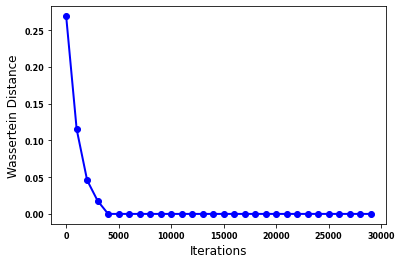

In [ ]:
  SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.plot(itrs,wdist,LineWidth=2,color='blue',marker='o')
plt.ylabel('Wassertein Distance')
plt.xlabel('Iterations')
plt.savefig('plots/wasserstien_dist.pdf',format='pdf')
files.download('plots/wasserstien_dist.pdf')

In [ ]:
torch.log(torch.cosh(Xg-Xg))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0

In [ ]:
Grad[0]

tensor(-0.0014, dtype=torch.float64, grad_fn=<SelectBackward>)

In [ ]:
 Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
 Delta = Xg-Yg

In [ ]:
Delta[0]*Grad[0]

tensor([-5.1248e-08, -3.7342e-08, -8.6038e-08,  1.0220e-14],
       dtype=torch.float64, grad_fn=<MulBackward0>)

In [ ]:
(math.pi-abs(X[0][0]-Y[0][1]))*cos(abs(X[0][0]-Y[0][1]))+sin(abs(X[0][0]-Y[0][1]))

IndexError: ignored

In [ ]:
def  compute_norminf_kernel(X,Y): 
    n = X.shape[0]
    m = Y.shape[0]
    out = torch.tensor(np.zeros((n,m))).type(dtype)
    for i in range(n): 
      for j in range(m): 
        out[i,j] = torch.max(torch.abs(X[i,:]-Y[j,:]))
    return 1-out


def  compute_norminf_kernel_index(X,Y): 
    n = X.shape[0]
    m = Y.shape[0]
    out = torch.tensor(np.zeros((n,m))).type(dtype)
    signs = torch.tensor(np.zeros((n,m))).type(dtype)
    indices = torch.tensor(np.zeros((n,m))).type(torch.long)
    for i in range(n): 
      for j in range(m): 
        out[i,j] = torch.max(torch.abs(X[i,:]-Y[j,:]))
        indices[i,j] = torch.argmax(torch.abs(X[i,:]-Y[j,:]))
        ij = indices[i,j]
        signs[i,j] = torch.sign(X[i,ij]-Y[j,ij])
    return 1-out,indices,signs
def  compute_elastic_kernel(X,Y,eps=0.01): 
    n = X.shape[0]
    m = Y.shape[0]
    out = torch.tensor(np.zeros((n,m))).type(dtype)
    for i in range(n): 
      for j in range(m): 
        out[i,j] = torch.max(torch.abs(X[i,:]-Y[j,:]))+ eps*torch.norm(X[i,:]-Y[j,:])
    return 1-out

In [ ]:
K,Ind,Sign = compute_norminf_kernel_index(X,Y)

In [ ]:
torch.nn.functional.softmax((torch.abs(X[i,:]-Y[j,:])))

NameError: ignored

In [ ]:
def  grad_norminf_kernel(X,Y):
  gradout = torch.zeros(X.size())
  n = X.size(0)
  m = Y.size(0)
  K,Ind,Sign = compute_norminf_kernel_index(X,Y)
  for i in range(n): 
    for j in range(m): 
      gradout[i,Ind[i,j]] += Sign[i,j]
  return -1*gradout

0.1901018790702539 0.3247595264191645
0.058146603729677615 0.19764235376052372
0.06909182342531373 0.21650635094610965
0.05758305763701688 0.1767766952966369
0.06998699632278882 0.22534695471649932
0.06419358241821316 0.1767766952966369
0.06328127804069594 0.21650635094610965
0.04976669284740676 0.13975424859373686
0.06695509202966399 0.1767766952966369
0.06701035812146094 0.22534695471649932
0.04666037640326459 0.1767766952966369


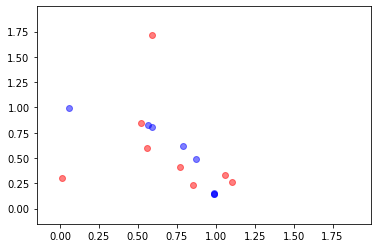

In [ ]:
# high dimesnions
def  compute_softmax_kernel(X,Y): 
    n = X.shape[0]
    m = Y.shape[0]
    out = torch.tensor(np.zeros((n,m))).type(dtype)
    XY  = X.mm(Y.t())
    normX = torch.norm(X,dim=1).reshape(n,1).repeat(1,m)
    normY = torch.norm(Y,dim=1).reshape(m,1).repeat(1,n).t()
    return 1-torch.sqrt(normX**2+normY**2-2*XY)

m1 = 8
m2 = 8
d =2
x = np.random.rand(m1,d)

X = torch.tensor(x,requires_grad=True).type(dtype)
y = np.random.rand(m2,d)
# y[0,0]=1 
# y[0,1:d] = 0 
# y[1,:] = 0 
# y[1,1]= 1
# y[2,:] = 0 
# y[2,2] = 1
Y =torch.tensor(y).type(dtype)
Y = torch.nn.functional.normalize(Y,p=2,dim=1)
gamma = 0.01
XI = []
YI = []
ind = 0
kernel_fun = compute_norminf_kernel
# X = torch.nn.functional.normalize(X,p=2,dim=1)
# Y = torch.nn.functional.normalize(Y,p=2,dim=1)
for k in range(3001):
    loss = - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
    grad = torch.autograd.grad(loss,X,retain_graph=True)[0] #(grad_norminf_kernel(X,X)-grad_norminf_kernel(X,Y))/(m1*m2) #
    X.data= X.data -gamma*(grad.data)+ gamma*torch.randn(X.size())
    # X = torch.nn.functional.normalize(X,p=2,dim=1)
    if k % 300 == 0:
      xi = X.data.detach().numpy()
      yi = Y.data.detach().numpy()
      XI.append(xi)
      YI.append(yi)
      print(loss.item(),torch.norm(grad).item())
      ind = ind + 1
    
      # fig, ax = plt.subplots()
      # a = 0
      # b = 2
      # ax.set_xlim(a, b)
      # ax.set_ylim(a, b )

      
      # ax.scatter(xi[:,0],xi[:,1],alpha=0.5,color='red')
      # ax.scatter(yi[:,0],yi[:,1],alpha=0.5,color='blue')
      # nameplot = 'plots/normaxconv%d.pdf' % (ind)
      # fig.savefig(nameplot)   
      # files.download(nameplot)
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
 n = X.shape[0]
    m = Y.shape[0]
    out = torch.tensor(np.zeros((n,m))).type(dtype)
    XY  = X.mm(Y.t())
    normX = torch.norm(X,dim=1).reshape(n,1).repeat(1,m)
    normY = torch.norm(Y,dim=1).reshape(m,1).repeat(1,n).t()
    return 1-torch.sqrt(normX**2+normY**2-2*XY)

IndentationError: ignored

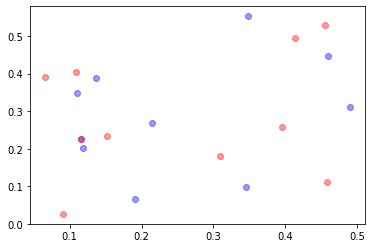

In [ ]:
plt.scatter(xi[:,0],xi[:,1],color='blue',alpha=0.4)
plt.scatter(yi[:,0],yi[:,1],color='red',alpha=0.4)


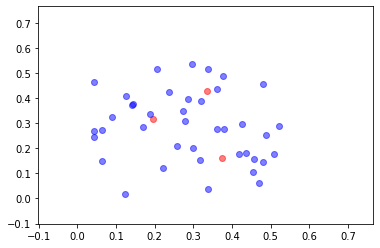

In [ ]:
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
X[0:d,:].size()

torch.Size([5, 5])

In [ ]:
yi

array([[0.71182659, 0.70235526],
       [0.20254108, 0.97927377],
       [0.43651323, 0.89969784],
       [0.72571224, 0.68799836],
       [0.77832787, 0.62785804]])

In [ ]:
gamma

0.001

In [ ]:
i = 1
j = 0
print(1- torch.max(torch.abs(X[i,:]-Y[j,:]))-kernel_fun(X,Y)[i,j])

tensor(0., dtype=torch.float64, grad_fn=<SubBackward0>)


In [ ]:
X

tensor([[0.4159, 0.4222],
        [0.6395, 0.6565],
        [0.1216, 0.8884],
        [0.7919, 0.1651]], dtype=torch.float64, requires_grad=True)

In [ ]:
torch.max(torch.abs(X[i,:]-Y[j,:]))

tensor(0.1430, dtype=torch.float64, grad_fn=<MaxBackward1>)

In [ ]:
xi

array([[1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
kernel_fun(X,Y)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64, grad_fn=<CopySlices>)

-0.08876109781179636 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795292204010929 0.038277085585928794 0.038277085585928794
-0.2795

IndexError: ignored

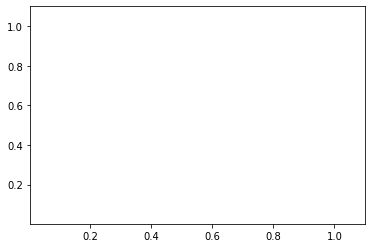

In [ ]:
m1 = 20
m2 = 20
d = 4

x = np.random.rand(m1,d)

X = torch.tensor(x,requires_grad=True).type(dtype)
y = np.random.rand(m2,d)
Y =torch.tensor(y).type(dtype)
X = torch.nn.functional.normalize(X,p=2,dim=1)
Y = torch.nn.functional.normalize(Y,p=2,dim=1)

gamma = 0.05
XI = []
YI = []
ind = 0
kernel_fun = compute_kernel_mat_approximate
dim1 = 0
dim2 = d
optim_num = d
for k in range(10001):
  loss = - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
  grad = torch.autograd.grad(loss,X,retain_graph=True)[0] #(grad(X,X)-grad(X,Y)).reshape(m1,d)
  if k % 300 == 0:
    X1 =  torch.nn.functional.normalize(X,p=2,dim=1)
    xi = X1.data.detach().numpy()
    yi = Y.data.detach().numpy()
    XI.append(xi[:,0:2])
    YI.append(yi[:,0:2])
    x0 = xi[0,dim1:dim2].reshape(1,dim2-dim1).repeat(m1,axis=0)
    x1 = xi[1,dim1:dim2].reshape(1,dim2-dim1).repeat(m1,axis=0)
    print(loss.item(),min(np.linalg.norm(x0-yi[:,dim1:dim2],axis=1)),min(np.linalg.norm(x1-yi[:,dim1:dim2],axis=1)))
   
    ind = ind + 1
  X.data[0:optim_num,dim1:dim2] = X.data[0:optim_num,dim1:dim2] - gamma*grad.data[0:optim_num,dim1:dim2] #+ gamma*torch.randn(X.size())
  X =  torch.nn.functional.normalize(X,p=2,dim=1)
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
X.data[0:optim_num,dim1:dim2].size()

torch.Size([4, 4])

0.0013590411247887335


In [ ]:
# m1 = 10
# m2 = 6
# d = 2
# X = torch.tensor(np.random.randn(m1,d),requires_grad=True).type(dtype)
# Y =torch.tensor(np.random.randn(m2,d)).type(dtype)
# X = torch.nn.functional.normalize(X,p=2,dim=1)
# Y = torch.nn.functional.normalize(Y,p=2,dim=1)
# gamma = 0.1
# XI = []
# YI = []

# for k in range(10000):
#   loss = torch.mean(compute_kernel_mat(X,X)) - 2*torch.mean(compute_kernel_mat(X,Y))+ torch.mean(compute_kernel_mat(Y,Y)) 
#   X = X - gamma*torch.autograd.grad(loss,X,retain_graph=True)[0] 
#   X =  torch.nn.functional.normalize(X,p=2,dim=1)
#   if k % 200 == 0:
#     print(loss.item())
#     XI.append(X.data.detach().numpy())
#     YI.append(Y.data.detach().numpy())
    


# HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
m1 = 4
m2 = 4
d = 2
X = torch.tensor(np.random.randn(m1,d),requires_grad=True).type(dtype)
Y =torch.tensor(np.random.randn(m2,d)).type(dtype)
X = torch.nn.functional.normalize(X,p=2,dim=1)
Y = torch.nn.functional.normalize(Y,p=2,dim=1)
a = torch.tensor(np.random.randn(m1,1),requires_grad=True).type(dtype)
gamma = 0.1
XI = []
YI = []

for k in range(100000):
  X.data = torch.nn.functional.normalize(X,p=2,dim=1)
  XX = compute_kernel_mat(X,X)
  XY = compute_kernel_mat(X,Y)
  Vec = torch.mean(XY,dim=1) 
  loss = a.t().mm(XX).mm(a)/(m1*m1) - 2*a.t().mm(Vec.reshape(m1,1))/(m1)+ torch.mean(compute_kernel_mat(Y,Y))

  X.data = X.data - gamma*torch.autograd.grad(loss,X,retain_graph=True)[0]
  a.data = a.data - gamma*torch.autograd.grad(loss,a,retain_graph=True)[0] 
  if k % 4000 == 0:
    print(loss.item())
    AX = a.detach().expand(m1,d) * X.detach()  
    XI.append(AX.numpy())
    YI.append(Y.numpy())


ValueError: ignored

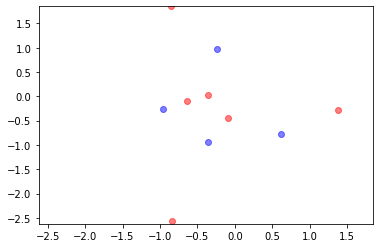

In [ ]:
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
m1 = 20
m2 = 4
d = 2
X = torch.tensor(np.random.randn(m1,d),requires_grad=True).type(dtype)
Y =torch.tensor(np.random.rand(m2,d)).type(dtype)
Y = torch.nn.functional.normalize(Y,p=2,dim=1)
XI = []
YI = []
gamma = 0.1

lamd = 0.001
for k in range(20000):
  XX = compute_kernel_mat(X,X)
  XY = compute_kernel_mat(X,Y)
  Vec = torch.mean(XY,dim=1) 
  XXI = XX + lamd*torch.eye(m1).type(dtype)
  a = m1*XXI.inverse().mm(Vec.reshape(m1,1))
  loss = a.t().mm(XX).mm(a)/(m1*m1) - 2*a.t().mm(Vec.reshape(m1,1))/(m1)+ torch.mean(compute_kernel_mat(Y,Y))

  X = X - gamma*torch.autograd.grad(loss,X,retain_graph=True)[0]     
  if k % 1000 == 0:
    print(loss.item())
    AX = a.detach().expand(m1,d) * X.detach()  
    XI.append(AX.numpy())
    YI.append(Y.numpy())


0.00011959819955870143
8.400101382716185e-05
7.37566042610105e-05
6.853898823580562e-05
6.458135021128464e-05
6.110407882950475e-05
5.790582963582924e-05
5.492208665652809e-05
5.2125955150389425e-05
4.950355261884587e-05
4.7046797314154176e-05
4.475173532400567e-05
4.261466565028127e-05
4.0630062197177796e-05
3.8789944392908504e-05
3.7084096450618054e-05
3.5500771358887295e-05
3.402758149650964e-05
3.265234467536571e-05
3.136374409068443e-05


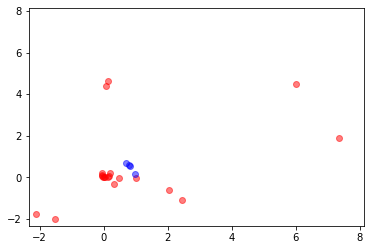

In [ ]:
HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
(-0.5) % (2*math.pi)

5.783185307179586

In [ ]:
2*math.pi+1/2

6.783185307179586

In [ ]:
(2*math.pi+0.5)

6.783185307179586

In [ ]:
2*math.pi

6.283185307179586

In [ ]:
d = 3
I = np.eye(d)
A = np.ones((d,d))
A = 2*I-A


In [ ]:
U,s = np.linalg.eig(A)

In [ ]:
U

array([-1.,  2.,  2.])

In [ ]:
s

array([[ 0.57735027, -0.81649658,  0.42755853],
       [ 0.57735027,  0.40824829, -0.81618716],
       [ 0.57735027,  0.40824829,  0.38862863]])

In [ ]:
# counter example 
##### 2D case 
pdist = torch.nn.PairwiseDistance(p=2)
def compute_ang_kernel(X,Y):
  # K = (X-Y)**2
  # K = -1*(K) 
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  # K = (math.pi-Delta) *torch.cos(X-Y)+torch.sin(X-Y)
  Delta =torch.abs(Xg-Yg) 
  return torch.abs(math.pi-Delta)*torch.cos(Delta)+torch.sin(Delta)#(math.pi-Delta)*torch.sqrt(1-torch.sin(Delta))*torch.sqrt(1+torch.sin(Delta))#*torch.cos(Delta)+torch.sin(Delta) #(math.pi-Delta)*torch.cos(Delta)+torch.sin(Delta)#0.25-0.25*torch.sin(Delta)#*torch.cos(Xg+Yg)#torch.abs(torch.sin(Xg)-torch.sin(Yg))#(math.pi-Delta)#*torch.cos(Delta) + torch.sin(Delta) #torch.tanh(Xg-Yg)*torch.cos(Xg-Yg) #(math.pi-Delta)#(math.pi - Delta)**2#*torch.cos(Delta) + torch.sin(Delta) 
def compute_w1(X,Y):
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  Delta =torch.abs(Xg-Yg).detach().numpy()
  return compute_transport(Delta)

def gradf(X,Y):
  Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
  Delta =(Xg-Yg ) % math.pi
  K = torch.sin(Delta)
  K.fill_(1)
  K[torch.logical_and(Xg-Yg>-1*math.pi, Xg-Yg<0)]  = -1
  K[torch.logical_and(Xg-Yg>math.pi, Xg-Yg<2*math.pi)]  = -1
  return -1*torch.mean((math.pi-Delta)*torch.sin(Delta)*K ,axis=1) #torch.mean(-1*(math.pi-Delta)*torch.sign(Delta),dim=1)#torch.mean(-1*(math.pi-torch.abs(Delta))*torch.sin(Delta),dim=1)
m1 = 4
m1h = int(m1/2.0)
m2 = 6
m2h =int(m2/2.0)
wdist = []
d = 1
x = math.pi*(np.random.rand(m1h,1))/2 #+ math.pi*np.ones((m1,1))/2
X = torch.tensor(np.r_[x,x-math.pi],requires_grad=True).type(dtype)
# X.data.fill_(0.1)
y = math.pi*(np.random.rand(m2,1))/2
Y =torch.tensor(np.c_[y,y-math.pi]).type(dtype)
gamma = 0.01
ind = 0 
XI = []
YI = []
itrs =[]
kernel_fun = compute_ang_kernel
# for k in range(5000):
#   loss =  - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y))  #
#   # print(torch.autograd.grad(loss,X,retain_graph=True)[0][0])\
#   grad = torch.autograd.grad(loss,X,retain_graph=True)[0]
#   X.data =  X.data - gamma*grad.data#(gradf(X,X)-gradf(X,Y)).reshape(m1,1) # torch.autograd.grad(loss,X,retain_graph=True)[0] #
#   onesT = torch.ones(X.size()).type(dtype)
#   X =  X % (math.pi)
#   # X = X- torch.mean(X)
#   if k % 100 == 0:
#       Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
#       Delta =Xg-Yg
#       # grad = -gradf(X,Y)
#       print(torch.sum(grad).item())
#       # Ele = Grad[0]
#       # print( torch.mean(torch.sign(Xg-Yg)))
#       Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
#       Delta = Xg-Yg
#       # print(torch.cos(Delta[0]).detach().numpy())
#       # print((torch.sin(Delta)*Grad[0]).detach().numpy())
#       # wdist.append(compute_w1(X,Y))
#       # print(loss.item(),compute_w1(X,Y))
#       print(loss.item(),torch.norm(grad).item())
#       print('--')
#       itrs.append(k)
#       A = X.data.detach().numpy()
#       B = Y.data.detach().numpy()
#       Xi = np.c_[np.sin(A),np.cos(A)]
#       Yi = np.c_[np.sin(B),np.cos(B)]
#       XI.append(Xi)
#       YI.append(Yi)
#       # plt.figure()
#       # plt.scatter(Xi[:,0],Xi[:,1],alpha=0.5,color='red')
#       # plt.scatter(Yi[:,0],Yi[:,1],alpha=0.5,color='blue')
#       # nameplot = 'plots/conv%d.pdf' % (ind)
#       # plt.savefig(nameplot)   
#       # files.download(nameplot)
#       ind = ind + 1

# HTML(animated_plot(XI,YI).to_html5_video())

In [ ]:
(gradf(X,X)-gradf(X,Y)).reshape(m1,1) 

tensor([[6.4763e-17],
        [0.0000e+00],
        [0.0000e+00],
        [3.7007e-17]], dtype=torch.float64, grad_fn=<ViewBackward>)

In [ ]:
gradf(X,X)

tensor([-2.7756e-16, -8.9245e-17,  1.6653e-16,  1.1102e-16],
       dtype=torch.float64, grad_fn=<MulBackward0>)

In [ ]:
loss =  - 2*torch.mean(kernel_fun(X,Y))  + torch.mean(kernel_fun(X,X)) + torch.mean(kernel_fun(Y,Y)) 
torch.autograd.grad(loss,X,retain_graph=True)[0]

tensor([[-0.3931],
        [-0.1664],
        [-0.3646],
        [-0.0353]], dtype=torch.float64)

In [ ]:
Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
Delta =(Xg-Yg ) 

In [ ]:
Delta/math.pi

tensor([[ 0.5499,  1.5499,  0.3000,  1.3000,  0.4163,  1.4163,  0.1950,  1.1950,
          0.2872,  1.2872,  0.5875,  1.5875],
        [-0.0058,  0.9942, -0.2557,  0.7443, -0.1394,  0.8606, -0.3607,  0.6393,
         -0.2686,  0.7314,  0.0318,  1.0318],
        [ 0.5648,  1.5648,  0.3148,  1.3148,  0.4312,  1.4312,  0.2099,  1.2099,
          0.3020,  1.3020,  0.6024,  1.6024],
        [-0.0227,  0.9773, -0.2726,  0.7274, -0.1563,  0.8437, -0.3776,  0.6224,
         -0.2854,  0.7146,  0.0149,  1.0149]], dtype=torch.float64,
       grad_fn=<DivBackward0>)

In [ ]:
Xg,Yg = torch.meshgrid(torch.flatten(X),torch.flatten(Y))
Delta =(Xg-Yg ) % math.pi
K = torch.sin(Delta)

In [ ]:

K[torch.logical_and(Xg-Yg<math.pi, Xg-Yg>0)] = 1

In [ ]:
K

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         0.1228, 1.0000, 0.0565],
        [1.0000, 0.3877, 1.0000, 0.3769, 1.0000, 0.3987, 1.0000, 1.0000, 1.0000,
         0.6068, 1.0000, 0.5525],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000]], dtype=torch.float64,
       grad_fn=<IndexPutBackward>)